## 딥러닝 영상처리 이해 (동아대학교)
# CNN 과 최신 영상기술

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [4]:
tf.__version__

'2.5.0'

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10258647333260715932,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1418189211
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12694619874386505075
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 960M, pci bus id: 0000:01:00.0, compute capability: 5.0"]

### 이미지(사진) 의 이해

In [23]:
image = plt.imread('bob_dylan.jpg')

In [27]:
type(image)

numpy.ndarray

In [24]:
image

array([[[ 57,  55,  40],
        [ 71,  69,  54],
        [ 74,  71,  54],
        ...,
        [146, 147, 129],
        [125, 126, 108],
        [ 85,  86,  68]],

       [[ 51,  49,  34],
        [ 67,  65,  50],
        [ 73,  70,  53],
        ...,
        [144, 142, 129],
        [ 99,  97,  84],
        [ 56,  54,  41]],

       [[ 54,  52,  37],
        [ 66,  64,  49],
        [ 70,  67,  50],
        ...,
        [122, 117, 111],
        [ 59,  54,  48],
        [ 25,  20,  14]],

       ...,

       [[102,  96,  74],
        [ 95,  87,  66],
        [110,  99,  79],
        ...,
        [117, 115,  92],
        [106, 104,  81],
        [ 94,  92,  69]],

       [[108, 102,  80],
        [112, 104,  83],
        [125, 114,  94],
        ...,
        [113, 111,  88],
        [110, 108,  85],
        [106, 104,  81]],

       [[108, 102,  80],
        [129, 121, 100],
        [138, 127, 107],
        ...,
        [101,  99,  76],
        [108, 106,  83],
        [116, 114,  91]]

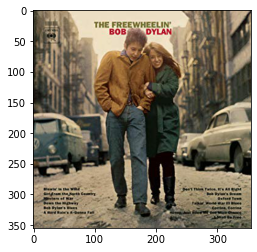

In [25]:
plt.imshow(image)

In [26]:
image.shape

(355, 355, 3)

### image writable error test

In [7]:
from PIL import Image
#a = plt.imread('snoopy.jpg')
a = np.array(Image.open('snoopy.jpg'))

In [8]:
a[0,0,0] = 1 # plt.imread() 호출시 쓰기 금지임

### CNN 케라스 적용

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [9]:
model = keras.models.Sequential()

In [10]:
model.add(keras.layers.Conv2D(50, (3,3), padding='same',
                    activation='relu', input_shape=(32,32,3)))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Conv2D(100, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Flatten())                       # 3차원->1차원으로 풀어줌
model.add(keras.layers.Dense(10, activation='softmax')) # 다중분류 출력층

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=100,
                    validation_split=0.2)

### cifar-10 이미지 파일

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [12]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [15]:
labels = ['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [16]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [18]:
y_train[0,0]

6

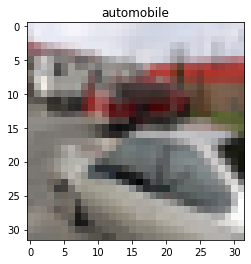

In [21]:
plt.title(labels[y_train[-1,0]])
plt.imshow(X_train[-1])

- 전처리
> 정수값(0\~255)을 실수값(0.0\~1.0)으로 바꾼다

In [23]:
X_train = X_train/255
X_train.max(), X_train.min()

(1.0, 0.0)

In [24]:
X_test = X_test/255
X_test.max(), X_test.min()

(1.0, 0.0)

In [25]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

> - 원핫인코딩 (One-Hot-Encoding)
> - 0 -> 1000000000
> - 1 -> 0100000000
> - 6 -> 0000001000

In [27]:
np.eye(10)[6]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [28]:
np.eye(10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [30]:
y_train = np.eye(10)[y_train.ravel()]
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [31]:
y_train.shape

(50000, 10)

In [32]:
y_test = np.eye(10)[y_test.ravel()]
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [33]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(50, (3,3), padding='same',
                    activation='relu', input_shape=(32,32,3)))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Conv2D(100, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Flatten())                       # 3차원->1차원으로 풀어줌
model.add(keras.layers.Dense(10, activation='softmax')) # 다중분류 출력층

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [35]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10,
                    validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 16s 29ms/step - loss: 1.5630 - acc: 0.4433 - val_loss: 1.3521 - val_acc: 0.5246
Epoch 2/10
313/313 [==============================] - 8s 26ms/step - loss: 1.1955 - acc: 0.5819 - val_loss: 1.2004 - val_acc: 0.5852
Epoch 3/10
313/313 [==============================] - 8s 26ms/step - loss: 1.0549 - acc: 0.6338 - val_loss: 1.0838 - val_acc: 0.6267
Epoch 4/10
313/313 [==============================] - 8s 27ms/step - loss: 0.9694 - acc: 0.6650 - val_loss: 1.0217 - val_acc: 0.6484
Epoch 5/10
313/313 [==============================] - 8s 27ms/step - loss: 0.9081 - acc: 0.6869 - val_loss: 0.9611 - val_acc: 0.6707
Epoch 6/10
313/313 [==============================] - 8s 27ms/step - loss: 0.8482 - acc: 0.7104 - val_loss: 0.9523 - val_acc: 0.6735
Epoch 7/10
313/313 [==============================] - 9s 28ms/step - loss: 0.8083 - acc: 0.7219 - val_loss: 0.9166 - val_acc: 0.6851
Epoch 8/10
313/313 [==============================] - 8s 26ms/step -

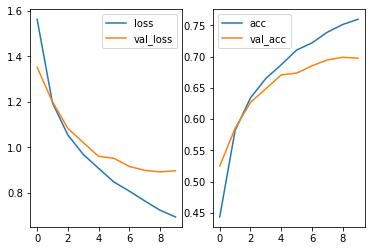

In [36]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

- 테스트 (X_test, y_test)

In [38]:
result = model.predict(X_test)

In [40]:
result.shape

(10000, 10)

In [41]:
result[0]

array([1.6388377e-04, 4.8029338e-05, 5.6242023e-04, 8.9010435e-01,
       1.3393458e-04, 7.9666980e-02, 2.9160231e-03, 8.4124948e-04,
       2.4335481e-02, 1.2276571e-03], dtype=float32)

In [43]:
result[0].round(2) # 신경망 계산값 (출력값)

array([0.  , 0.  , 0.  , 0.89, 0.  , 0.08, 0.  , 0.  , 0.02, 0.  ],
      dtype=float32)

In [44]:
y_test[0] # 실제값 또는 목표값

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [45]:
result.argmax(axis=1)

array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [46]:
y_test.argmax(axis=1)

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [47]:
(result.argmax(axis=1) == y_test.argmax(axis=1)).mean()

0.6929

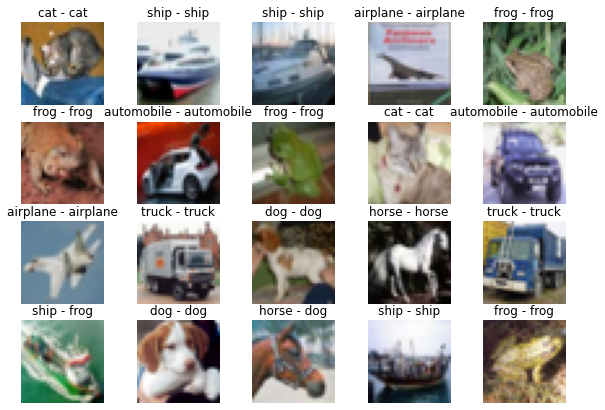

In [48]:
y_pred = model.predict(X_test[:20])
plt.figure(figsize=[10,7])

for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(labels[np.argmax(y_test[i])] + ' - ' + labels[np.argmax(y_pred[i])])

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 50)        1400      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 50)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 100)       45100     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 100)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                64010     
Total params: 110,510
Trainable params: 110,510
Non-trainable params: 0
________________________________________________

### 중간층 추가

In [52]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(50, (3,3), padding='same',
                    activation='relu', input_shape=(32,32,3)))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Conv2D(100, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Conv2D(200, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [53]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 50)        1400      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 50)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 100)       45100     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 100)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 200)         180200    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 200)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3200)             

In [54]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [55]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10,
                    validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 14s 40ms/step - loss: 1.6313 - acc: 0.4007 - val_loss: 1.3328 - val_acc: 0.5239
Epoch 2/10
313/313 [==============================] - 11s 36ms/step - loss: 1.1814 - acc: 0.5784 - val_loss: 1.0767 - val_acc: 0.6179
Epoch 3/10
313/313 [==============================] - 11s 36ms/step - loss: 0.9788 - acc: 0.6533 - val_loss: 0.9491 - val_acc: 0.6670
Epoch 4/10
313/313 [==============================] - 11s 36ms/step - loss: 0.8350 - acc: 0.7085 - val_loss: 0.8546 - val_acc: 0.7043
Epoch 5/10
313/313 [==============================] - 11s 36ms/step - loss: 0.7276 - acc: 0.7462 - val_loss: 0.8217 - val_acc: 0.7200
Epoch 6/10
313/313 [==============================] - 11s 36ms/step - loss: 0.6358 - acc: 0.7771 - val_loss: 0.7826 - val_acc: 0.7340
Epoch 7/10
313/313 [==============================] - 12s 38ms/step - loss: 0.5606 - acc: 0.8033 - val_loss: 0.7924 - val_acc: 0.7411
Epoch 8/10
313/313 [==============================] - 12s 37ms